In [1]:
import sys
import numpy as np
import matplotlib

In [2]:
print('Python version', sys.version)
print('Numpy version',np.__version__)
print('Matplotlib version',matplotlib.__version__)

Python version 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Numpy version 1.18.5
Matplotlib version 3.2.2


## Working of Single Neuron

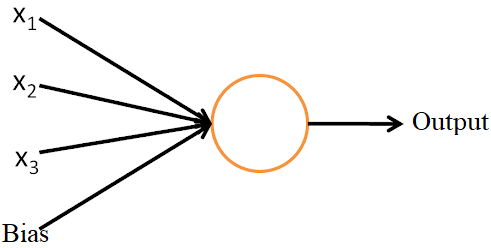

In [3]:
inputs = [2.1,3.1,4]
weights = [2,9,3.5]
bias = 2.2 #Every neuron has one bias

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

48.300000000000004


## Working of one neuron layer

Here we have one layer of three neurons with four inputs

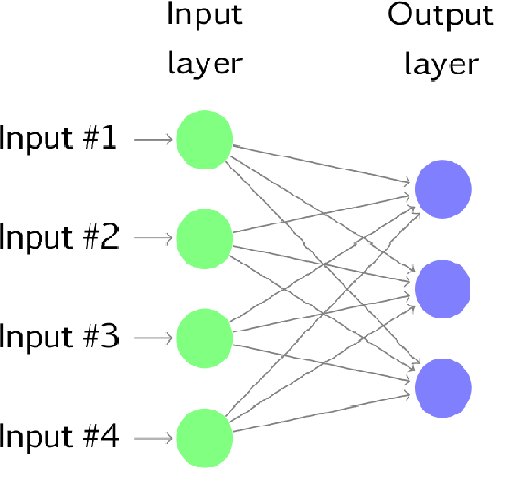

##### Note:  Here we are not showing bias in neurons, but its always present in every neuron

In [4]:
inputs = [2.1,3.1,4,6]
weights1 = [2,9,3.5,-2.1]
weights2 = [1.5,-5,7.5,4]
weights3 = [2.8,3,-2.9,6]
bias1 = 2.2 #Every neuron has one bias
bias2 = 3
bias3 = 4

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)

[35.7, 44.65, 43.58]


#### Now for those who are crying out loud to use loops, Enjoyy!!

In [5]:
inputs = [2.1,3.1,4,6]
weights = [[2,9,3.5,-2.1],
          [1.5,-5,7.5,4],
          [2.8,3,-2.9,6]]
biases = [2.2,3,4]

In [6]:
layer_output = []
for neuron_Weights, neuron_bias in zip(weights,biases):
    print('neuron_Weights : ',neuron_Weights,' neuron_bias : ',neuron_bias)
    neuron_output = 0 #Output of given neuron
    for n_inputs, weight in zip(inputs,neuron_Weights):
        neuron_output +=  n_inputs*weight
    neuron_output += neuron_bias
    layer_output.append(neuron_output)

print(layer_output)

neuron_Weights :  [2, 9, 3.5, -2.1]  neuron_bias :  2.2
neuron_Weights :  [1.5, -5, 7.5, 4]  neuron_bias :  3
neuron_Weights :  [2.8, 3, -2.9, 6]  neuron_bias :  4
[35.7, 44.65, 43.58]


#### Okay you numpy freaks, here's your one line code

In [7]:
output = np.dot(weights,np.array(inputs).T) + biases
print(output)

[35.7  44.65 43.58]


## Working with batch of inputs

Now we have more than one rows of input, So this is how we'll proceed for calculations

In [8]:
inputs = [[2.1,3.1,4,6],
         [1.5,3.4,2,4.1],
         [3.1,2,5.1,3.25]]
weights = [[2,9,3.5,-2.1],
          [1.5,-5,7.5,4],
          [2.8,3,-2.9,6]]
biases = [2.2,3,4]

1. Here we have to transpose our inputs for matrix multiplication
2. After np.dot we'll again transpose so that biases will add with our matrix accordingly.

In [9]:
output = np.dot(weights,np.array(inputs).T).T + biases
print(output)

[[35.7   44.65  43.58 ]
 [34.19  19.65  37.2  ]
 [37.425 48.9   23.39 ]]


### Adding one more layer

In [10]:
inputs = [[2.1,3.1,4,6],
         [1.5,3.4,2,4.1],
         [3.1,2,5.1,3.25]]
weights1 = [[2,9,3.5,-2.1],
          [1.5,-5,7.5,4],
          [2.8,3,-2.9,6]]
biases1 = [2.2,3,4]

weights2 = [[1,8,2.5],
          [0.5,-4,6.5],
          [1.8,2,-1.9]]

biases2 = [3.2,4,5]

In [11]:
layer_1_output = np.dot(weights1,np.array(inputs).T).T + biases1
print('layer_1_output\n',layer_1_output)
output = np.dot(weights2,np.array(layer_1_output).T).T + biases2
print('\n output layer \n',output)

layer_1_output
 [[35.7   44.65  43.58 ]
 [34.19  19.65  37.2  ]
 [37.425 48.9   23.39 ]]

 output layer 
 [[505.05   126.52    75.758 ]
 [287.59   184.295   35.162 ]
 [490.3    -20.8525 125.724 ]]


### After looking mathematics behind single neuron, single layer 
### Now we will code to generalise things: Making Layers, Activation Function etc.

In [12]:
np.random.seed(0)

class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

### Things to be noted:
1. 0.1 is multiplied in self weight as we want to initialize weights in range -1 to 1.
2. The weights matrix here is input_features X no of neurons in that layer but in above cases you can see that weight matrix was no of neurons X input_features.
    Reason: 
    - As we need to transpose input matrix while np.dot so to avoid that extra transpose during forward propagation we have done this.
3. We are doing inputs X weights to avoid extra transpose

In [13]:
X = [[2.1,3.1,4,6],
         [1.5,3.4,2,4.1],
         [3.1,2,5.1,3.25]]

In [14]:
layer1 = Layer_Dense(4,5) # 4 - no of input features, 5 - no of neurons (random)
layer2 = Layer_Dense(5,2) # 5 - output from layer 1, 2 - no of neurons (random)

In [15]:
layer1.forward(X)
layer2.forward(layer1.output)

In [16]:
print('matrix after layer1 : \n',layer1.output)
print('\n matrix after layer2 : \n',layer2.output)

matrix after layer1 : 
 [[0.32531687 1.85671727 0.33993437 0.67510036 0.18456056]
 [0.09794856 1.28648076 0.1634419  0.45373233 0.15833058]
 [0.53330703 1.54132161 0.59459014 0.83783438 0.60985181]]

 matrix after layer2 : 
 [[ 0.18598328 -0.15149285]
 [ 0.14964398 -0.09807513]
 [ 0.22935267 -0.0920825 ]]


### ReLU Activation Function

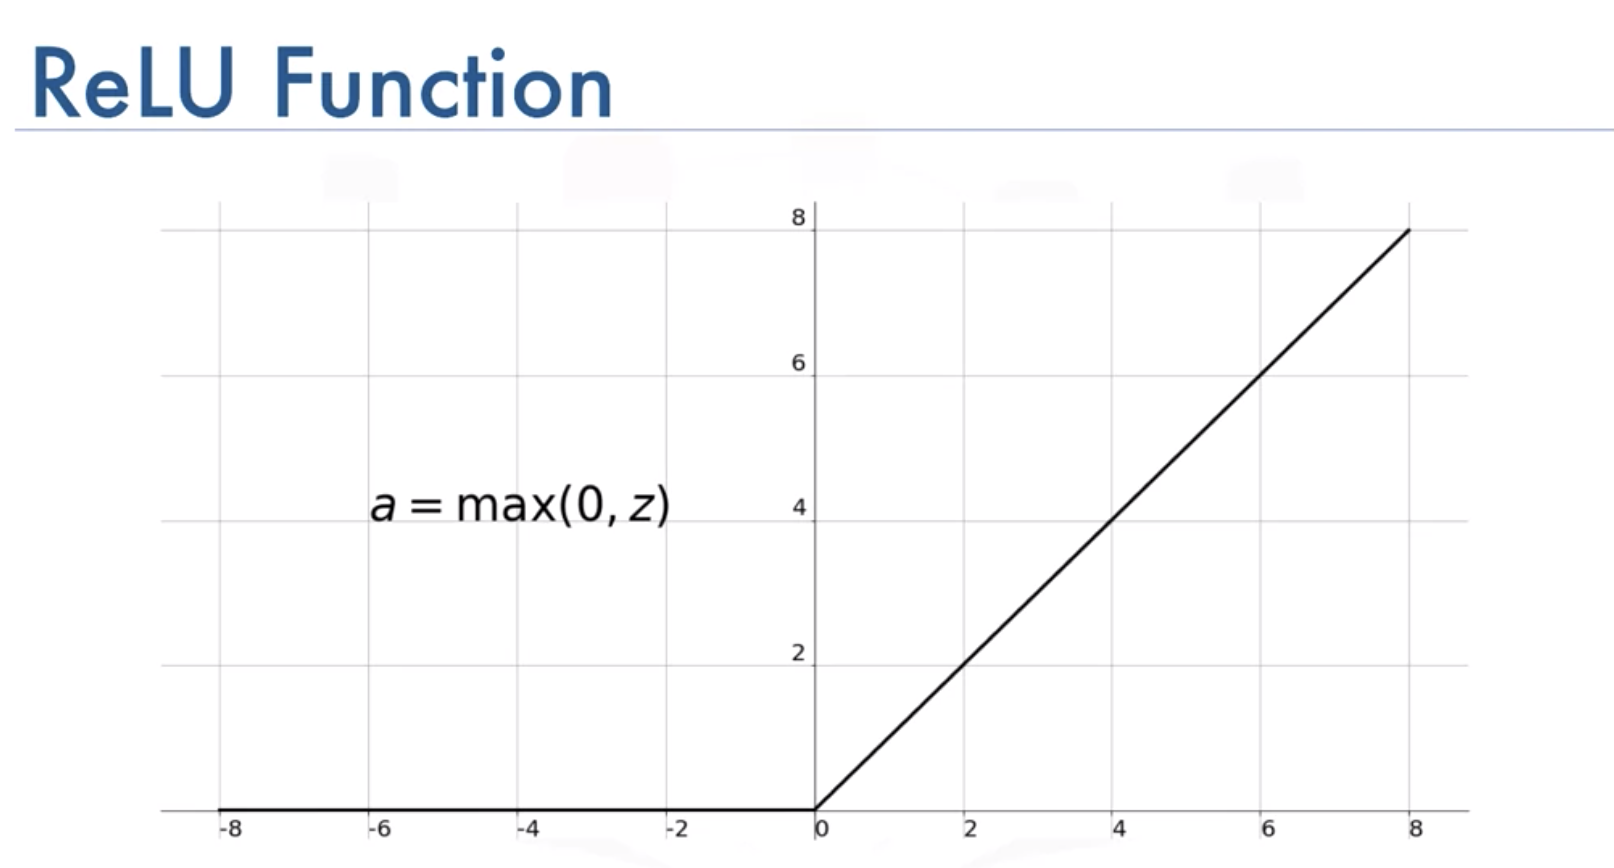

Equation :
x = {x if x>0 else 0}

##### Basic working code

In [17]:
inputs = [2,5,-9,7,-60,25,-1]
output = []
for i in inputs:
    output.append(max(0,i))

print(output)

[2, 5, 0, 7, 0, 25, 0]


In [18]:
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0, inputs)

In [19]:
np.random.seed(0)
def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0,1,points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

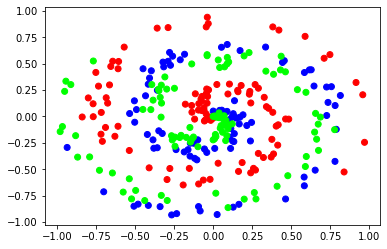

In [20]:
X, y = create_data(100,3)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap="brg")
plt.show()

In [21]:
X.shape

(300, 2)

In [22]:
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()
layer1.forward(X)
#print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.00000000e+00 8.72561871e-02
  0.00000000e+00]]


## Softmax Activation Function

                            Input ---------> Exponentiate ----------> Normalize ----------> Output

                                       Softmax =======> Exponentiate + Normalize

                                      Input ---------> Softmax ----------> Output

In [23]:
inputs = [3.5,4.6,2.2] #its the outfrom from layer
exp_val = np.exp(inputs)
norm_val = exp_val/np.sum(exp_val)
print(norm_val)

[0.23382526 0.70244992 0.06372482]


above output shows the probability of classification problem

#### For batch of inputs

In [24]:
inputs = [[3.5,4.6,2.2],
         [1.5,9.6,7.2],
         [5.5,1.6,6.2]]

In [25]:
exp_val = np.exp(inputs)
print(exp_val)

[[3.31154520e+01 9.94843156e+01 9.02501350e+00]
 [4.48168907e+00 1.47647816e+04 1.33943076e+03]
 [2.44691932e+02 4.95303242e+00 4.92749041e+02]]


In [26]:
norm_val = exp_val/np.sum(exp_val, axis=1, keepdims=True)
print(norm_val)

[[2.33825265e-01 7.02449916e-01 6.37248187e-02]
 [2.78215544e-04 9.16572228e-01 8.31495566e-02]
 [3.29598475e-01 6.67170315e-03 6.63729822e-01]]


#### There is an issue of overflow:   
It means when the input value is high the exponential becomes infinity thus failed to compute.

#### Solution
Substract the element of a row with its max_value of that row. Thus exp will limit to exp(0)

### Lets sum up our learnings till now

In [37]:
np.random.seed(0)

class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0, inputs)

class Activation_softmax:
    def forward(self, inputs):
        exp_val = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_val / np.sum(exp_val, axis=1, keepdims=True)
        self.output = probabilities

In [38]:
X, y = create_data(100,3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]]


## Implementing Loss

In [29]:
import math
softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0]

loss = -(math.log(softmax_output[0])*target_output[0]+
        math.log(softmax_output[1])*target_output[1]+
        math.log(softmax_output[2])*target_output[2])
print(loss)

0.35667494393873245


for Batch of output

In [30]:
softmax_output = np.array([[0.7,0.1,0.2],
                 [0.1,0.5,0.4],
                 [0.02,0.9,0.08]])
class_target = [0,1,1]

In [33]:
loss = -np.log(softmax_output[range(len(softmax_output)),class_target])
print(loss)

[0.35667494 0.69314718 0.10536052]


In [34]:
average_loss = np.mean(loss)
print(average_loss)

0.38506088005216804


#### Note: There is one case where we can get stuck. When our confidence is zero then -log(0) = inf and thus our average loss turn out to be infinity 

To avoid this case we will clip it to [e^-7, 1-e^-7]
we choose e^7 because its very near to zero, you can free to choose any value very near to zero.

In [36]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1: #when target is in scalar shape
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        elif len(y_true.shape) == 2: #when target is one hot encoded
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [39]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output,y)
print(loss)

1.0984449588022467
